# Problem Statement

Five million Americans are currently living with heart diseases, and the numbers are expected to rise. It is very important to understand the factors which causes Heart-attacks so that certain precaution can be taken by individuals. In-order to understand the reasons of the Heart-attack, a data was collected from various hospitals across US which is given in US_Heart_Patients.csv. In the data set there are Heart-Att indicates whether the person suffered from Heart attack or not.
Perform EDA on the data and build a model which will predict whether the person will suffer from Heart-attack or not.

Our Dataset has following variables:

1. **Gender**	        Male/Female
2. **age**             Age of the person
3. **education**       1 indicates High School, 2 indicates- Secondary School,3 indicates Graduation, 4 indicates Post Graduation
4. **currentSmoker**	1 Indicates person is a smoker and 0 indicates non- smoker
5. **cigsPerDay**    	Number of cigrattes consumed in a day
6. **BP Meds**	        1 indidates person is consuming BP medicines and 0 indicates person is not consuming BP medicines
7. **prevalentStroke**	1 indidates person had stroke in the past and 0 indicates person did not suffered from stroke in the past
8. **prevalentHyp**	1 indidates person is suffering from Hypertension  and 0 indicates person is not suffering from hypertension
9. **diabetes**	    1 indicates person is diabatic and 0 indicates person in non-diabetic
10. **tot cholesterol**	Indicates total cholesterol level in the body
11. **Systolic BP**	    Systolic BP of the person
12. **Diastolic BP**	Diastolic BP of the person
13. **BMI**	Indicates   BMI level in the body
14. **heartRate**	    Indicates body heartrate
15. **glucose**	        Glucose level of the body
16. **Heart-Att**	    1 Indicates  person suffered from Heart-attack and 0 indicates that person will not suffer from Heart-at



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('US_Heart_Patients.csv')

In [3]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   float64
 6   prevalentStroke  4231 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(14), int64(1), object(1)
memory usage: 530.1+ KB


In [5]:
df.shape

(4240, 16)

In [6]:
df.describe()

,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
count,4238.000000,4130.000000,4237.000000,4209.000000,4180.000000,4231.000000,4238.000000,4238.000000,4180.000000,4236.000000,4235.000000,4216.000000,4236.000000,3849.000000,4240.000000
mean,49.579283,1.979903,0.494218,9.001901,0.029665,0.005909,0.310524,0.025720,236.677273,132.362370,82.901889,25.798916,75.867800,81.951936,0.151887
std,8.572875,1.019943,0.500026,11.920742,0.169682,0.076650,0.462763,0.158316,44.616098,22.039244,11.914467,4.075256,11.999488,23.958428,0.358953
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.395000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Gender               8
age                  2
education          110
currentSmoker        3
cigsPerDay          31
BP Meds             60
prevalentStroke      9
prevalentHyp         2
diabetes             2
tot cholesterol     60
Systolic BP          4
Diastolic BP         5
BMI                 24
heartRate            4
glucose            391
Heart-Att            0
dtype: int64

<AxesSubplot:>

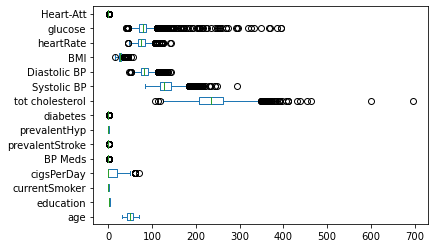

In [9]:
df.plot(kind='box',vert=0)

In [15]:
round(df['Heart-Att'].value_counts(normalize=True)*100,2)

0    84.81
1    15.19
Name: Heart-Att, dtype: float64

#### checking for Possible columns which are categorical but are not having data type "object"

In [16]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [19]:
cat=["education","currentSmoker","BP Meds","prevalentStroke","prevalentHyp","diabetes"]

In [20]:
for i in df[cat].columns:
    print(i.upper(),'--',df[i].nunique())
    print(df[i].value_counts())
    print('')

EDUCATION -- 4
1.0    1717
2.0    1252
3.0     688
4.0     473
Name: education, dtype: int64

CURRENTSMOKER -- 2
0.0    2143
1.0    2094
Name: currentSmoker, dtype: int64

BP MEDS -- 2
0.0    4056
1.0     124
Name: BP Meds, dtype: int64

PREVALENTSTROKE -- 2
0.0    4206
1.0      25
Name: prevalentStroke, dtype: int64

PREVALENTHYP -- 2
0.0    2922
1.0    1316
Name: prevalentHyp, dtype: int64

DIABETES -- 2
0.0    4129
1.0     109
Name: diabetes, dtype: int64



In [21]:
## Change the data types of these 7 features 
for i in df[cat].columns:
    df[i]=df[i].astype('object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   object 
 3   currentSmoker    4237 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   object 
 6   prevalentStroke  4231 non-null   object 
 7   prevalentHyp     4238 non-null   object 
 8   diabetes         4238 non-null   object 
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
dtypes: float64(8), int64(1), object(7)
memory usage: 530.1+ KB


#### Making different list for categorical columns and numerical columns


In [26]:
num=[]
cat=[]
for i in df.columns:
    if df[i].dtypes=='object':
        cat.append(i)
    else:
        num.append(i)
print(num)
print(cat)

['age', 'cigsPerDay', 'tot cholesterol', 'Systolic BP', 'Diastolic BP', 'BMI', 'heartRate', 'glucose', 'Heart-Att']
['Gender', 'education', 'currentSmoker', 'BP Meds', 'prevalentStroke', 'prevalentHyp', 'diabetes']


#### Describe for numerical and categorical columns

In [30]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4238.0,49.579283,8.572875,32.00,42.00,49.000,56.00,70.0
cigsPerDay,4209.0,9.001901,11.920742,0.00,0.00,0.000,20.00,70.0
tot cholesterol,4180.0,236.677273,44.616098,107.00,206.00,234.000,263.00,696.0
Systolic BP,4236.0,132.362370,22.039244,83.50,117.00,128.000,144.00,295.0
Diastolic BP,4235.0,82.901889,11.914467,48.00,75.00,82.000,90.00,142.5
BMI,4216.0,25.798916,4.075256,15.54,23.07,25.395,28.04,56.8
heartRate,4236.0,75.867800,11.999488,44.00,68.00,75.000,83.00,143.0
glucose,3849.0,81.951936,23.958428,40.00,71.00,78.000,87.00,394.0
Heart-Att,4240.0,0.151887,0.358953,0.00,0.00,0.000,0.00,1.0


In [29]:
df[cat].describe().T

,count,unique,top,freq
Gender,4232,2,Female,2414
education,4130.0,4.0,1.0,1717.0
currentSmoker,4237.0,2.0,0.0,2143.0
BP Meds,4180.0,2.0,0.0,4056.0
prevalentStroke,4231.0,2.0,0.0,4206.0
prevalentHyp,4238.0,2.0,0.0,2922.0
diabetes,4238.0,2.0,0.0,4129.0


#### unique values for categorical variables

In [31]:
for i in df.columns:
    if df[i].dtype=='object':
        print(i.upper(),'--',df[i].nunique())
        print(df[i].value_counts())
        print('')

GENDER -- 2
Female    2414
Male      1818
Name: Gender, dtype: int64

EDUCATION -- 4
1.0    1717
2.0    1252
3.0     688
4.0     473
Name: education, dtype: int64

CURRENTSMOKER -- 2
0.0    2143
1.0    2094
Name: currentSmoker, dtype: int64

BP MEDS -- 2
0.0    4056
1.0     124
Name: BP Meds, dtype: int64

PREVALENTSTROKE -- 2
0.0    4206
1.0      25
Name: prevalentStroke, dtype: int64

PREVALENTHYP -- 2
0.0    2922
1.0    1316
Name: prevalentHyp, dtype: int64

DIABETES -- 2
0.0    4129
1.0     109
Name: diabetes, dtype: int64



## Check data distribution before changing your data

In [37]:
df.columns

Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BP Meds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'tot cholesterol',
       'Systolic BP', 'Diastolic BP', 'BMI', 'heartRate', 'glucose',
       'Heart-Att'],
      dtype='object')

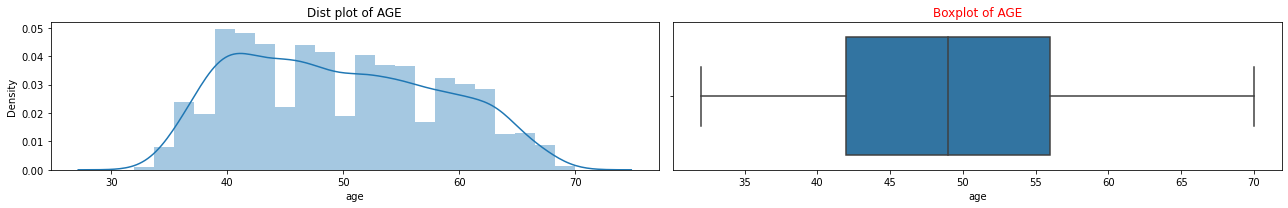

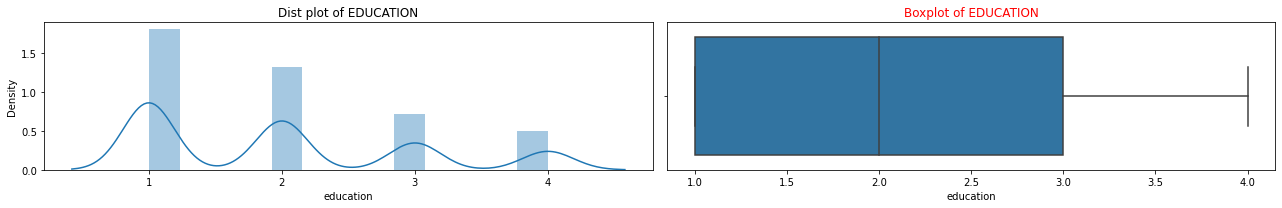

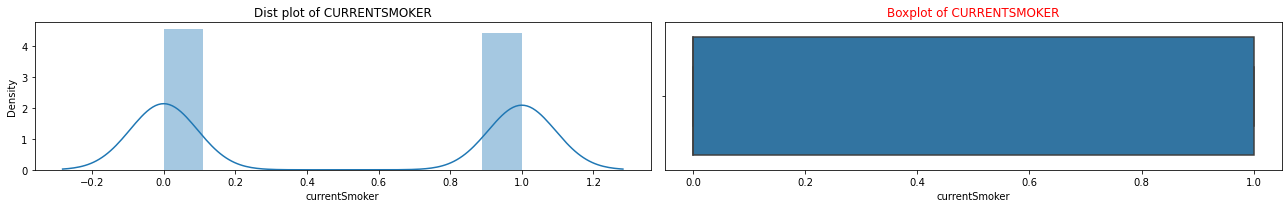

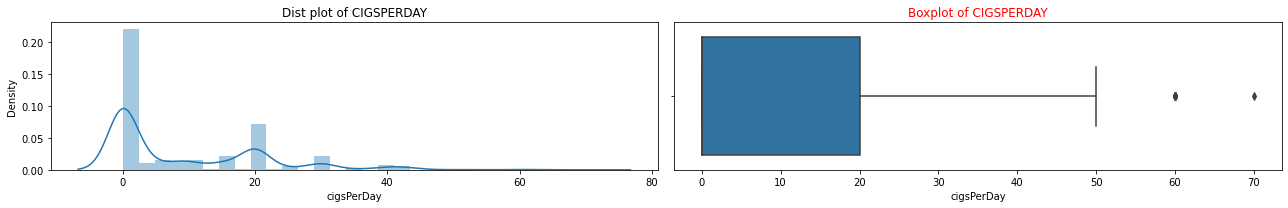

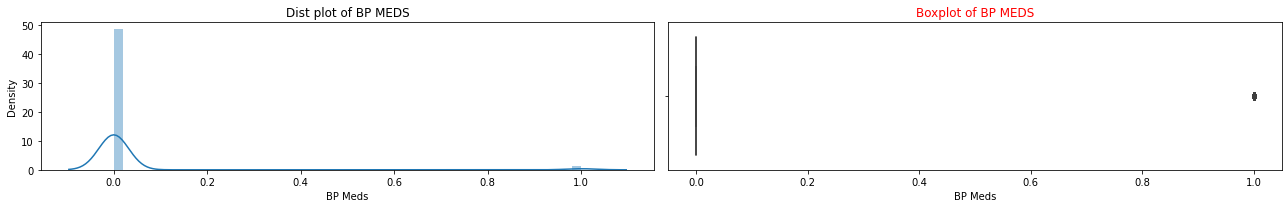

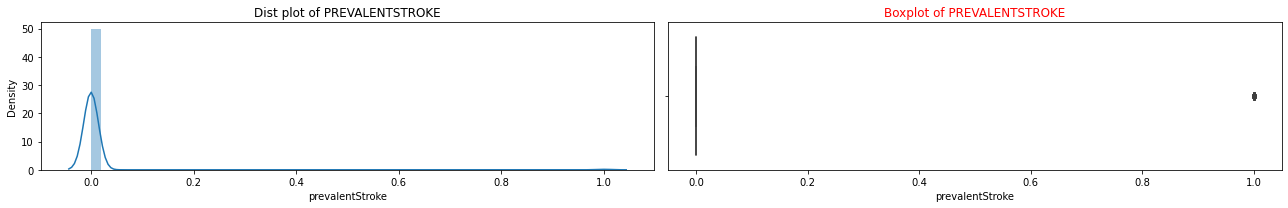

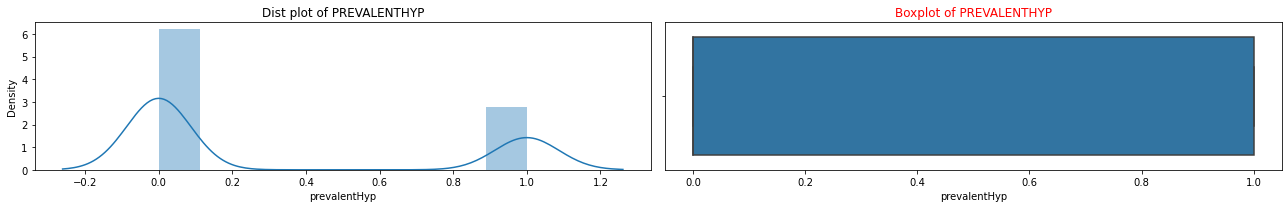

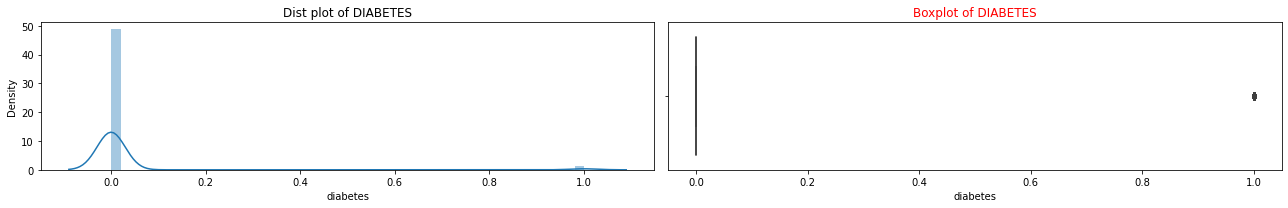

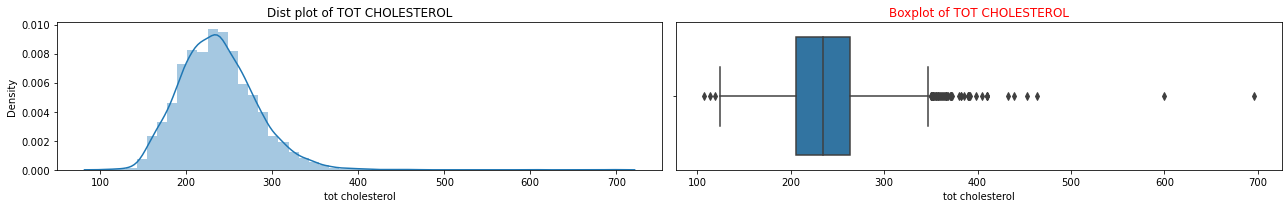

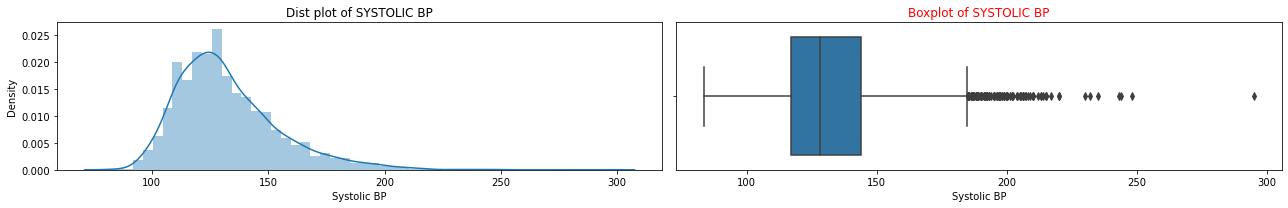

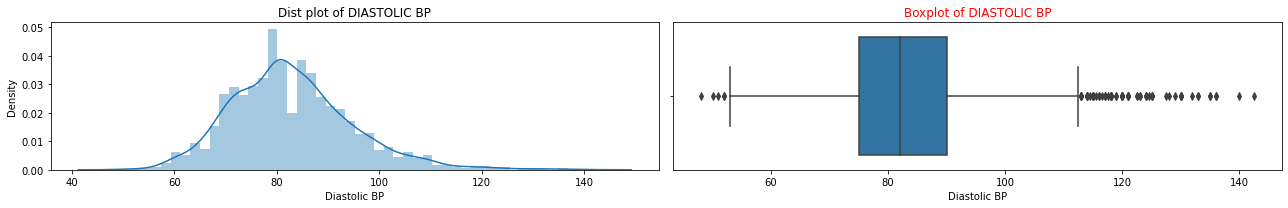

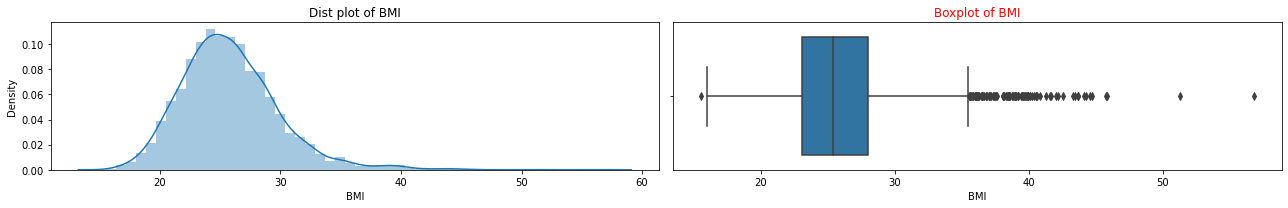

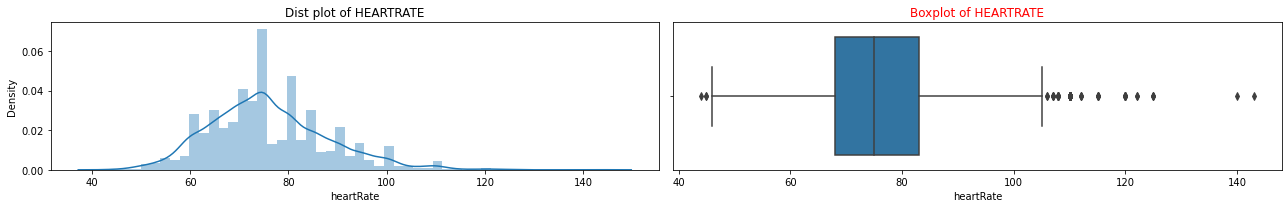

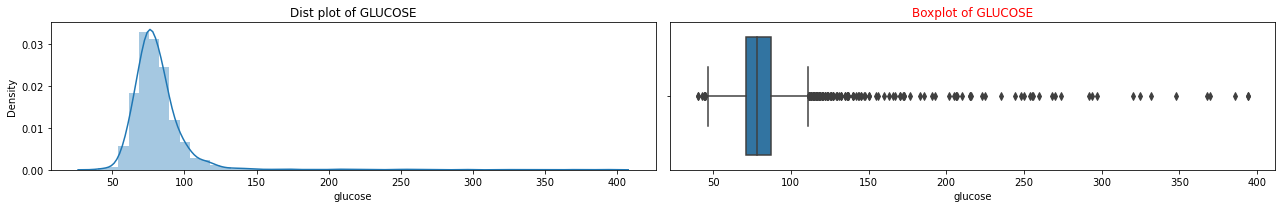

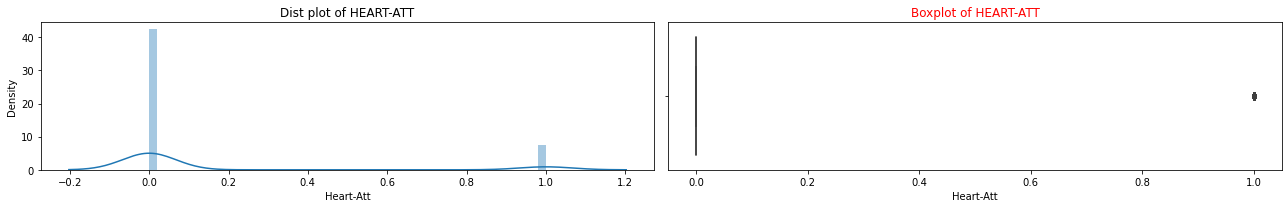

In [67]:
feature=['age', 'education', 'currentSmoker','cigsPerDay','BP Meds','prevalentStroke','prevalentHyp',
         'diabetes','tot cholesterol','Systolic BP', 'Diastolic BP', 'BMI', 'heartRate', 'glucose',
       'Heart-Att']
for i in feature:
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(18,3))
    a=sns.distplot(df[i],ax=ax1)
    a.set_title('Dist plot of {}'.format(i.upper()))
    b=sns.boxplot(df[i],ax=ax2)
    b.set_title('Boxplot of {}'.format(i.upper()),color='red')
    plt.tight_layout()

#### Bivariate Analysis with Dependent Variable

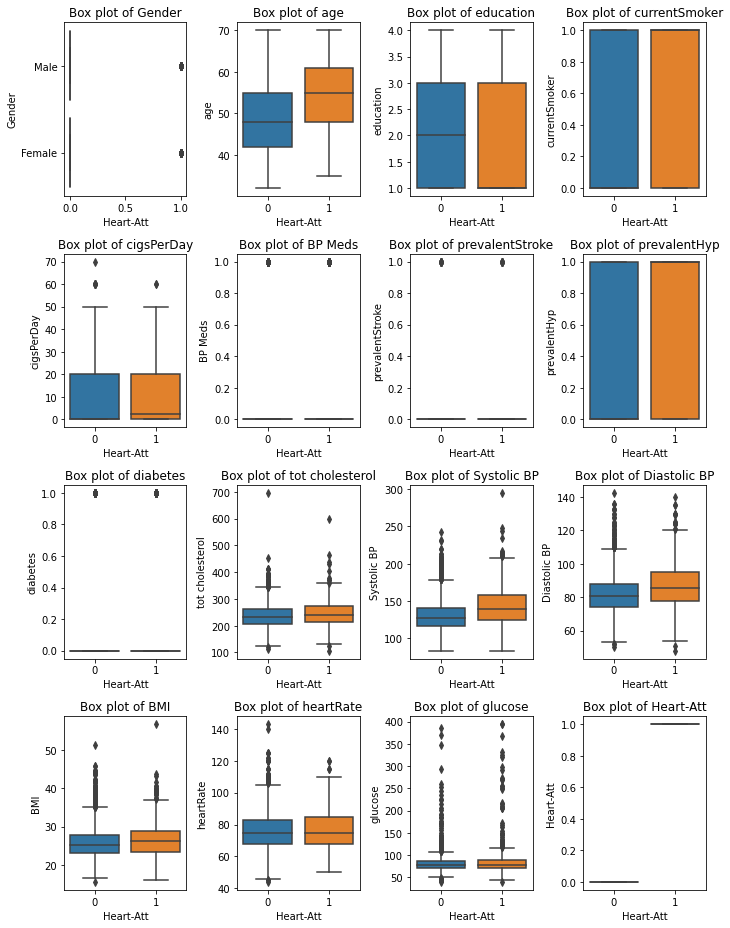

In [98]:
plt.figure(figsize=(10,13))
for i in range(len(df.columns)):
    plt.subplot(4,4,i+1)
    sns.boxplot(df['Heart-Att'],df[df.columns[i]])
    plt.title('Box plot of {}'.format(df.columns[i]))
    plt.tight_layout()

In [99]:
df.columns

Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BP Meds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'tot cholesterol',
       'Systolic BP', 'Diastolic BP', 'BMI', 'heartRate', 'glucose',
       'Heart-Att'],
      dtype='object')

In [101]:
df.rename(columns={'BP Meds':'BPMeds','tot cholesterol':'totcholesterol','Systolic BP':'SystolicBP','Diastolic BP':'DiastolicBP'},inplace=True)

### Imputation of all missing values with the bext possible option

In [104]:
df.Gender.mode()

0    Female
dtype: object

In [105]:
df['Gender']=df['Gender'].fillna(df.Gender.mode())

In [112]:
num=[]
cat=[]
for i in df.columns:
    if df[i].dtypes=='object':
        cat.append(i)
    else:
        num.append(i)

In [113]:
print(num)
print(cat)

['age', 'cigsPerDay', 'totcholesterol', 'SystolicBP', 'DiastolicBP', 'BMI', 'heartRate', 'glucose', 'Heart-Att']
['Gender', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']


In [116]:
from sklearn.impute import SimpleImputer
imputer1=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputer2=SimpleImputer(missing_values=np.nan,strategy='median')

In [122]:
df_cat=pd.DataFrame(imputer1.fit_transform(df[cat]),columns=df[cat].columns)
df_num=pd.DataFrame(imputer2.fit_transform(df[num]),columns=df[num].columns)

In [123]:
dfnew=pd.concat([df_num,df_cat],axis=1,join='inner')

In [125]:
dfnew.isnull().sum()

age                0
cigsPerDay         0
totcholesterol     0
SystolicBP         0
DiastolicBP        0
BMI                0
heartRate          0
glucose            0
Heart-Att          0
Gender             0
education          0
currentSmoker      0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
dtype: int64

In [128]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              4240 non-null   float64
 1   cigsPerDay       4240 non-null   float64
 2   totcholesterol   4240 non-null   float64
 3   SystolicBP       4240 non-null   float64
 4   DiastolicBP      4240 non-null   float64
 5   BMI              4240 non-null   float64
 6   heartRate        4240 non-null   float64
 7   glucose          4240 non-null   float64
 8   Heart-Att        4240 non-null   float64
 9   Gender           4240 non-null   object 
 10  education        4240 non-null   object 
 11  currentSmoker    4240 non-null   object 
 12  BPMeds           4240 non-null   object 
 13  prevalentStroke  4240 non-null   object 
 14  prevalentHyp     4240 non-null   object 
 15  diabetes         4240 non-null   object 
dtypes: float64(9), object(7)
memory usage: 530.1+ KB


<AxesSubplot:>

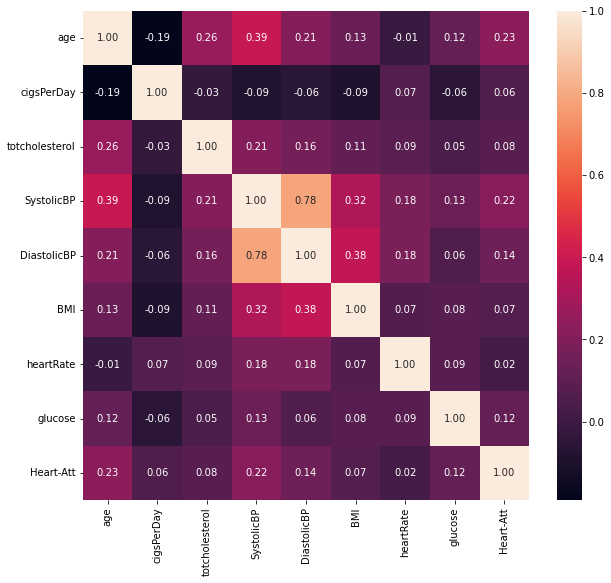

In [131]:
plt.figure(figsize=(10,9))
sns.heatmap(dfnew.corr(),annot=True,fmt='.2f')

In [132]:
dfnew.drop('SystolicBP',axis=1,inplace=True)

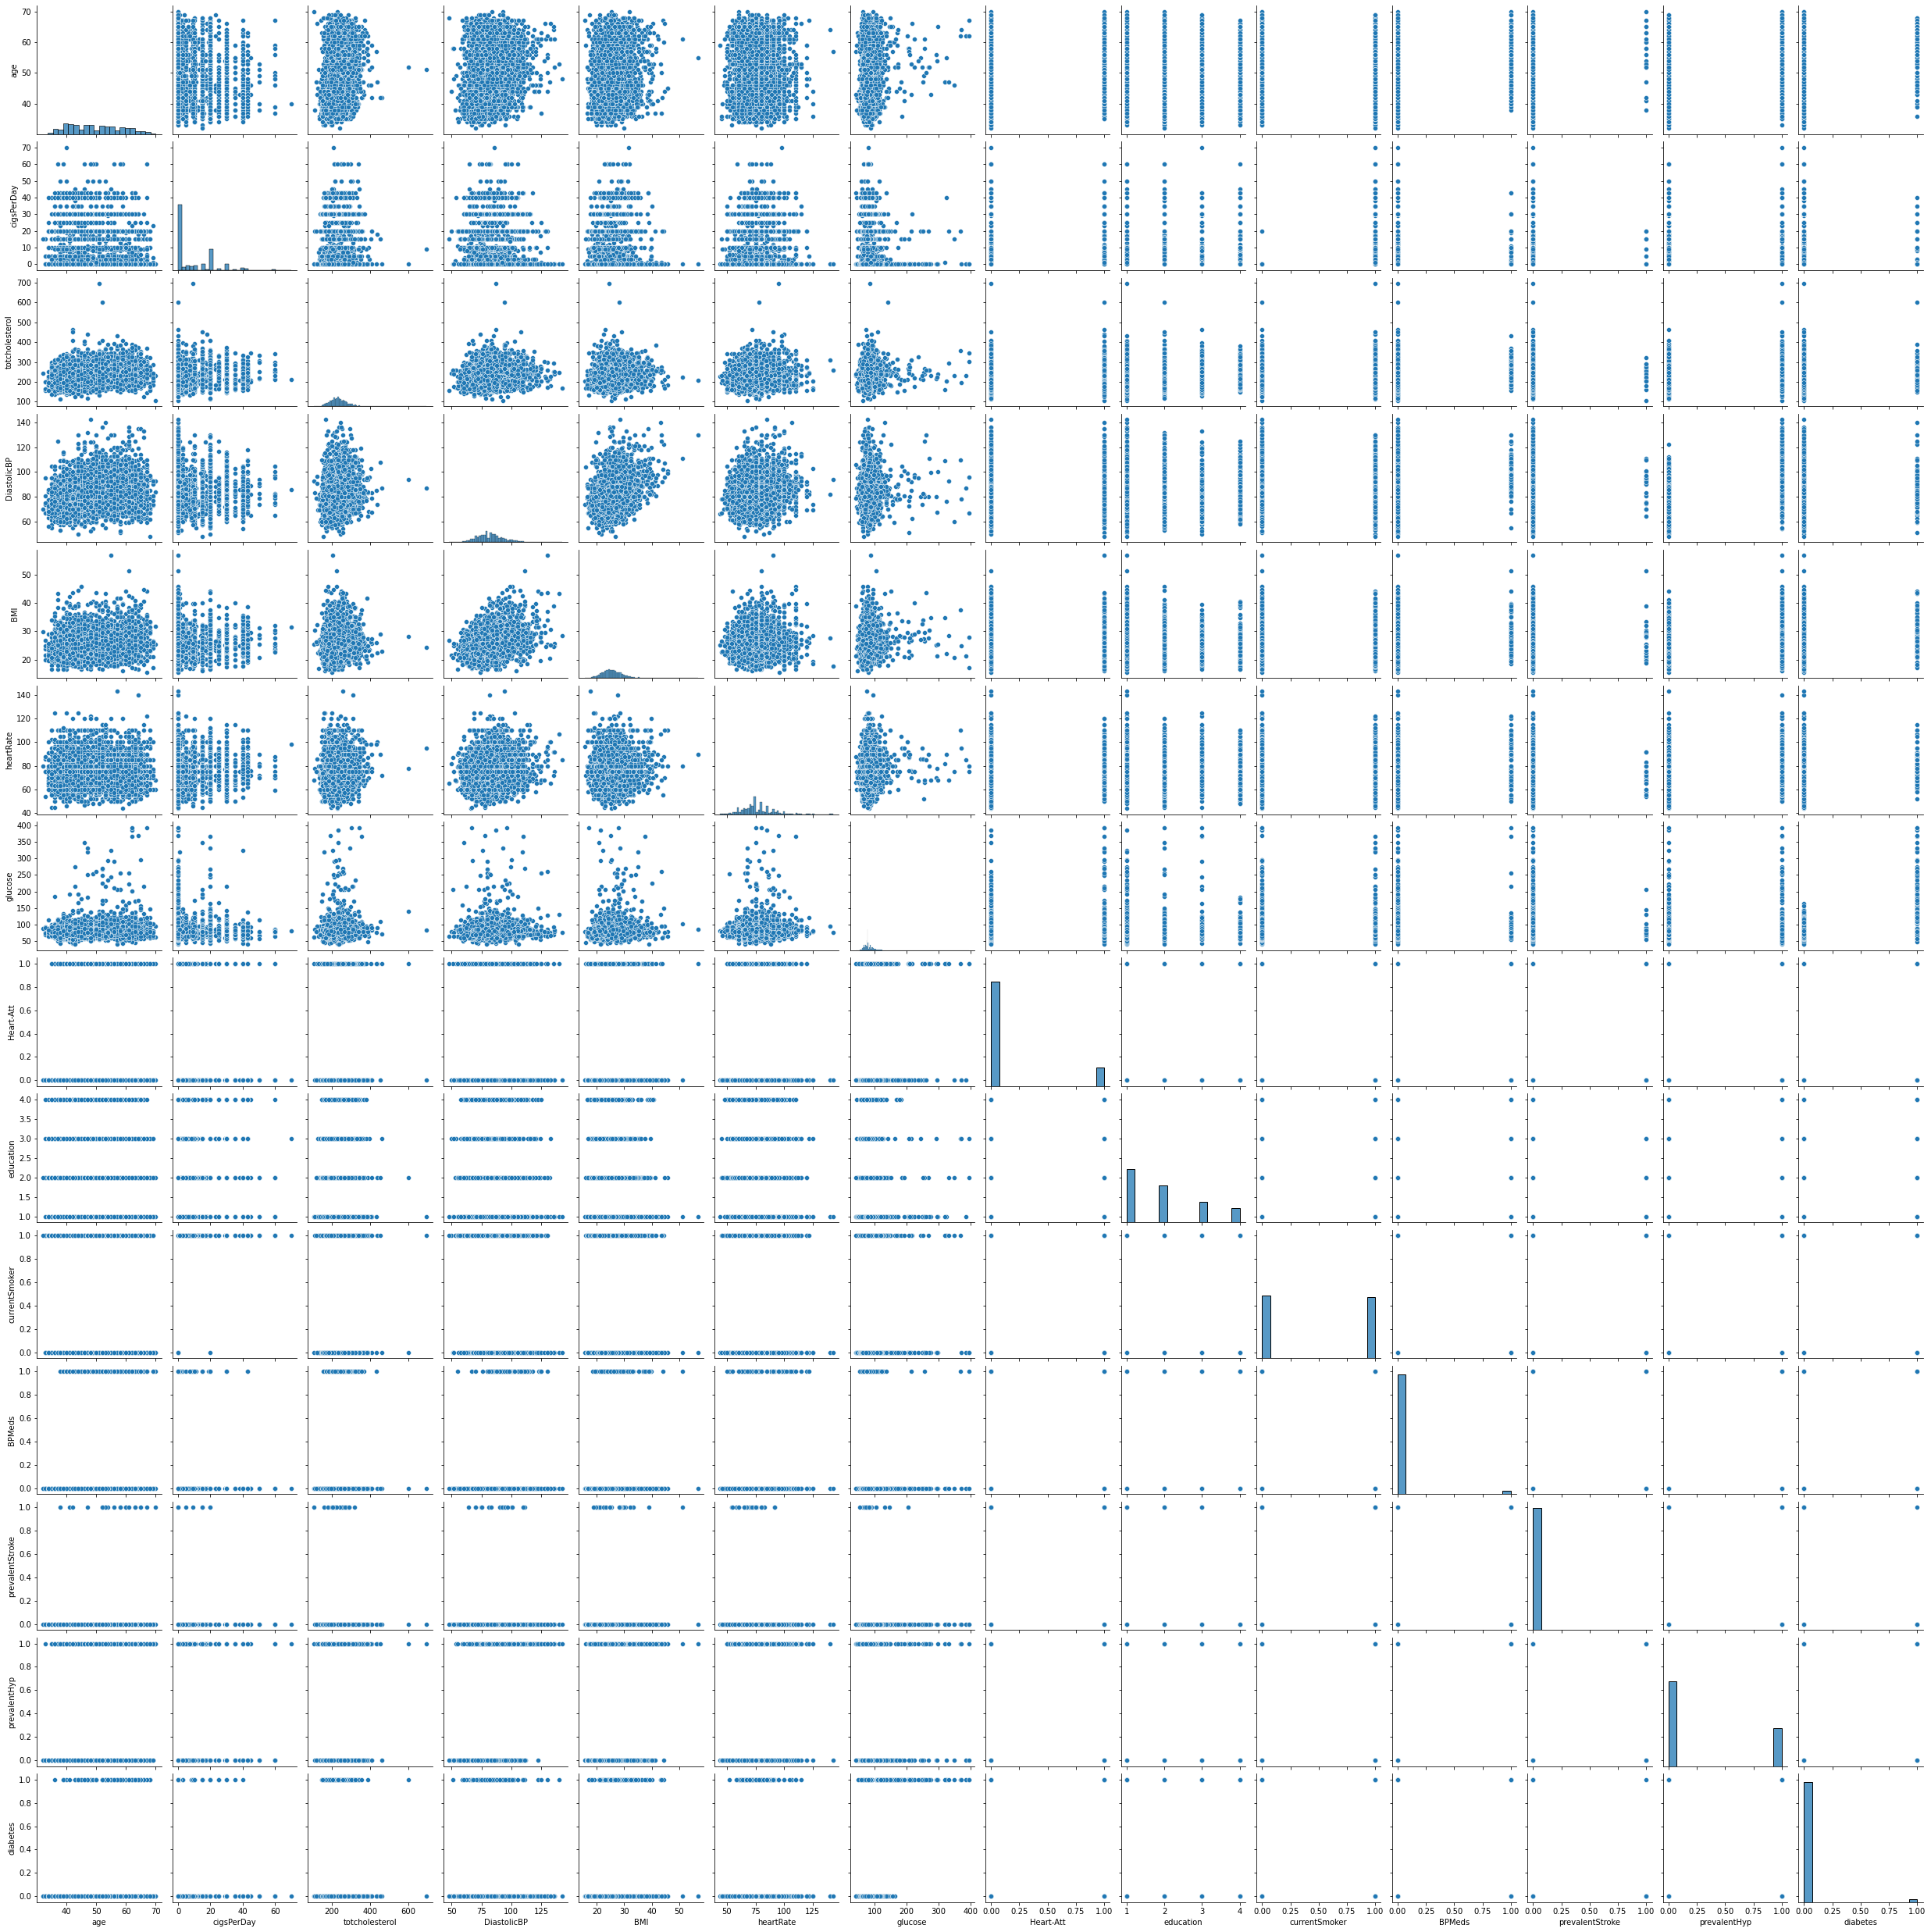

In [133]:
sns.pairplot(dfnew)

In [134]:
dfnew=pd.get_dummies(dfnew,columns=cat,drop_first=True)

In [135]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  4240 non-null   float64
 1   cigsPerDay           4240 non-null   float64
 2   totcholesterol       4240 non-null   float64
 3   DiastolicBP          4240 non-null   float64
 4   BMI                  4240 non-null   float64
 5   heartRate            4240 non-null   float64
 6   glucose              4240 non-null   float64
 7   Heart-Att            4240 non-null   float64
 8   Gender_Male          4240 non-null   uint8  
 9   education_2.0        4240 non-null   uint8  
 10  education_3.0        4240 non-null   uint8  
 11  education_4.0        4240 non-null   uint8  
 12  currentSmoker_1.0    4240 non-null   uint8  
 13  BPMeds_1.0           4240 non-null   uint8  
 14  prevalentStroke_1.0  4240 non-null   uint8  
 15  prevalentHyp_1.0     4240 non-null   u

<AxesSubplot:>

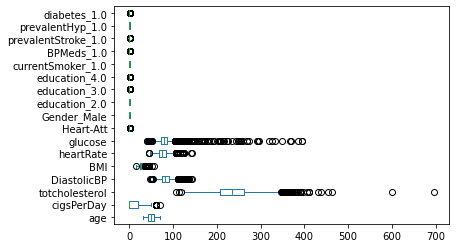

In [138]:
dfnew.plot(kind='box',vert=0)